In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
blogs_df = pd.read_csv(r"C:\Users\kavya\Downloads\blogs.csv")

In [5]:
blogs_df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [9]:
blogs_df.columns

Index(['Data', 'Labels'], dtype='object')

In [11]:
blogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [13]:
blogs_df.dtypes

Data      object
Labels    object
dtype: object

In [15]:
blogs_df.isnull().sum()

Data      0
Labels    0
dtype: int64

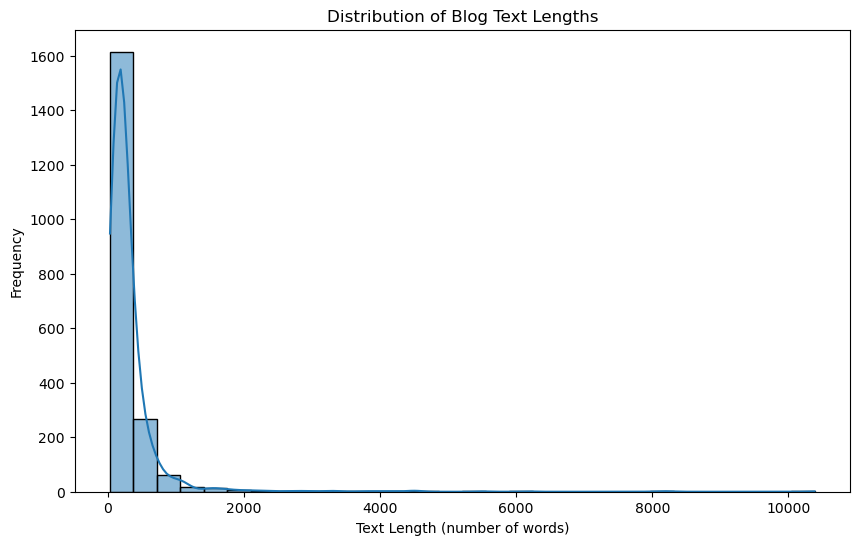

In [17]:
blogs_df['text_length'] = blogs_df['Data'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(blogs_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Blog Text Lengths')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Frequency')
plt.show()

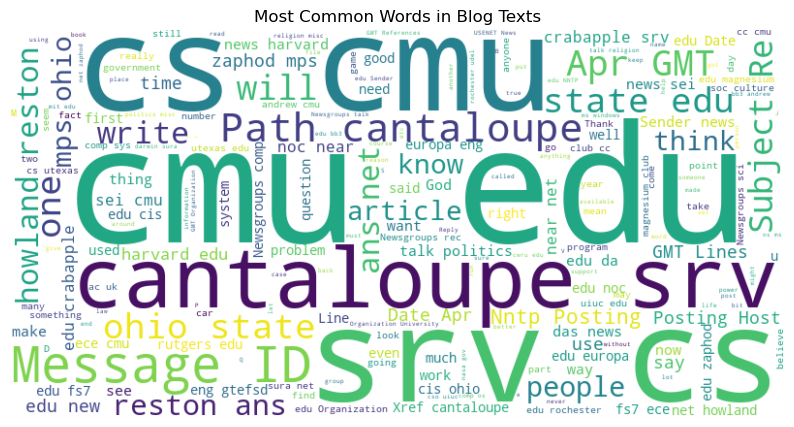

In [25]:
from wordcloud import WordCloud

all_text = ' '.join(blogs_df['Data'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()
     

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...


True

In [29]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

blogs_df['cleaned_text'] = blogs_df['Data'].apply(preprocess_text)

In [31]:
blogs_df.head()

,Data,Labels,text_length,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,910,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,163,newsgroup altath path cantaloupesrvcscmueducra...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,450,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,2732,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,438,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_features = tfidf_vectorizer.fit_transform(blogs_df['cleaned_text'])

print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (2000, 47412)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, blogs_df['Labels'], test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 47412)
Shape of X_test: (400, 47412)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.815
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.67      0.89      0.76        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.86      0.72      0.78        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       1.00      0.56      0.71        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.88 

In [43]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.815


In [47]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_text = "This blog post is really informative and helpful."
scores = sid.polarity_scores(sample_text)

print("Sentiment Scores:")
print(scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...


Sentiment Scores:
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.4703}


In [49]:
def categorize_sentiment(text):
    scores = sid.polarity_scores(text)
   
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

blogs_df['Sentiment'] = blogs_df['Data'].apply(categorize_sentiment)

print(blogs_df[['Data', 'Sentiment']])

                                                   Data Sentiment
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Positive
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Negative
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive
...                                                 ...       ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Positive
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  Positive
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  Negative

[2000 rows x 2 columns]


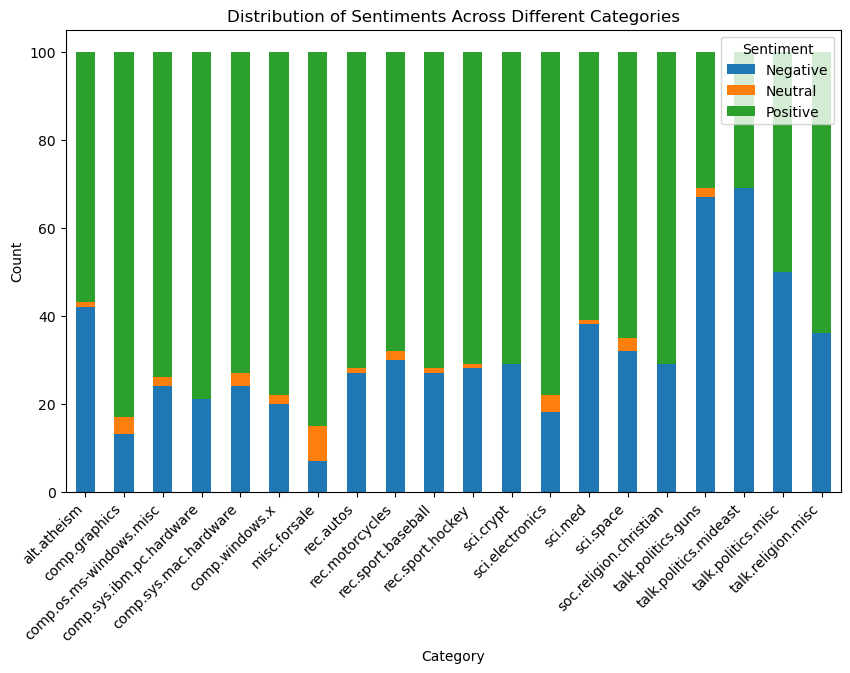

In [51]:
sentiment_distribution = blogs_df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

In [53]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))
     

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.67      0.89      0.76        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.86      0.72      0.78        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       1.00      0.56      0.71        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.88      0.88      0